<center> <h1>Homework 3 | DATA 5600</h1> </center>
<center> <h2>Simple Linear Regression Model Inference</h2> </center>
<center> <h3> Oliver Heady <h3> <center>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

## Data and Description

Climate change has left California particularly vulnerable to severe drought conditions. One factor affecting water availability in Southern California is stream runoff from snowfall (FYI: water in Utah is also heavily reliant on snowpack). If runoff could be predicted, engineers, planners, and policy makers could do their jobs more effectively because they would have an estimate as to how much water is entering the area.

The Runoff Water data set compares the stream runoff (column 2) (in acre-feet) of a river near Bishop, California (due east of San Jose) with snowfall (column 1) (in inches) at a site in the Sierra Nevada mountains. The data set contains 43 years' worth of measurements. Download the water.txt file from Canvas, and put it in the same folder as this R Markdown file.

#### 1. Read in the data set, and call the dataframe "water". Print a summary of the data and make sure the data makes sense.

In [ ]:
water = pd.read_table("/content/water.txt", delimiter=' ')
water.describe()

,Precip,Runoff
count,43.000000,43.000000
mean,13.522093,77756.046512
std,6.381867,25518.909111
min,4.600000,41785.000000
25%,8.705000,59857.000000
50%,12.140000,69177.000000
75%,16.920000,92205.500000
max,33.070000,146345.000000


#### 2. Create (and print) a scatterplot of the data with variables on the appropriate axes. Make you plot look professional (make sure the plot is squre and the axes labels are descriptive). You can save your plot as an function to be used throughout the rest of the assignment.

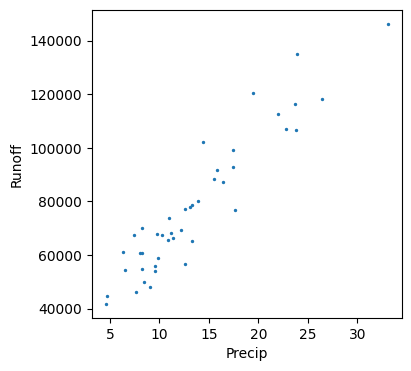

In [ ]:
# create a function that makes a scatterplot of precipitation and runoff
def water_scatter():
    fig = plt.figure(figsize=(4, 4))
    plt.scatter(x = water['Precip'], y = water['Runoff'], s = 2)
    plt.xlabel("Precip")
    plt.ylabel("Runoff")

water_scatter()

#### 3. Calculate (and print) the correlation coefficient. Use that and the scatterplot to briefly describe the relationship between Stream Runoff and Snowfall.

In [ ]:
# Prepare data
y = water['Runoff']
X = sm.add_constant(water['Precip'])
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Runoff   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     302.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.56e-20
Time:                        01:37:14   Log-Likelihood:                -451.13
No. Observations:                  43   AIC:                             906.3
Df Residuals:                      41   BIC:                             909.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.701e+04   3218.855      8.393      0.0

The correlation coefficient is 0.88, which means that there is a pretty strong positive linear correlation between precipitation and runoff.

#### 4. Add the OLS regression line to the scatterplot you created in 2. Print the plot.

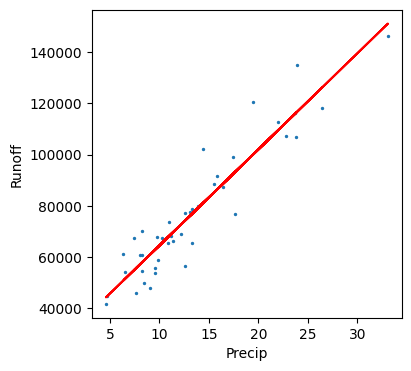

In [ ]:
# create a function that adds a regression line on the scatterplot of precipitation and runoff
def plot_ols_line(x, y):
    water_scatter()
    b1, b0 = np.polyfit(x, y, 1)
    plt.plot(x, b1 * x + b0, 'r')

plot_ols_line(water['Precip'], water['Runoff'])

#### 5. Fit a simple linear regression model to the data (no transformations), and save the residuals and fitted values to the `water` dataframe. Print a summary of the linear model.

In [ ]:
water['residuals'] = res.resid
water['fittedvalues'] = res.fittedvalues

### Questions 6 to 11 involve using diagnostics to determine if the linear regression assumptions are met. For each assumption, (1) perform appropriate diagnostics to determine if the assumption is violated, and (2) explain whether or not you think the assumption is violated and why you think that.

#### 6. (L) $X$ vs $Y$ is linear (use at least two diagnostic tools)

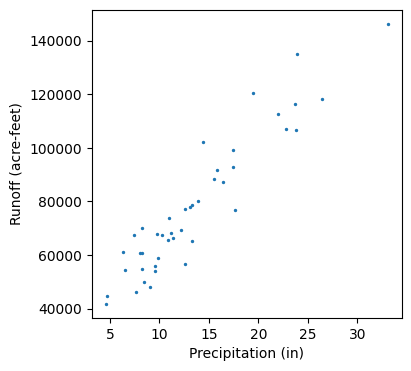

In [ ]:
# Scatterplot
fig = plt.figure(figsize = (4, 4))
plt.scatter(x = water['Precip'], y = water['Runoff'], s = 2)
plt.xlabel("Precipitation (in)")
plt.ylabel("Runoff (acre-feet)")
plt.show()

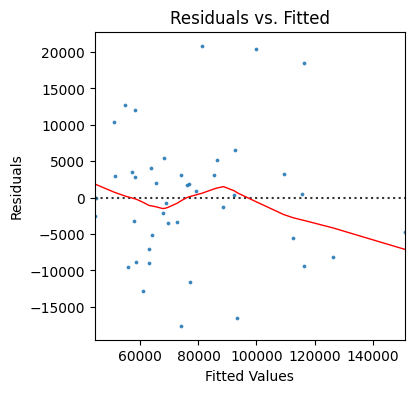

In [ ]:
# Residuals versus Fitted Values
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = water['fittedvalues'], y = water['residuals'],
                          lowess = True,
                          scatter_kws = {'s': 3},
                          line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

The scatterplot seems pretty linear, but the residuals aren't quite evenly spread. Not quite homoscedastic, we'll look at this later. The residuals versus fitted values also strays from the center line, meaning we'll need some transformation.

#### 7. (I) The residuals are independent (no diagnostic tools - just think about how the data was collected and briefly write your thoughts)

The data description didn't specify whether the data were randomly sampled. If we assume they were, then we can say the residuals are independent.

#### 8. (N) The residuals are normally distributed and centered at zero (use at least three diagnostic tools)

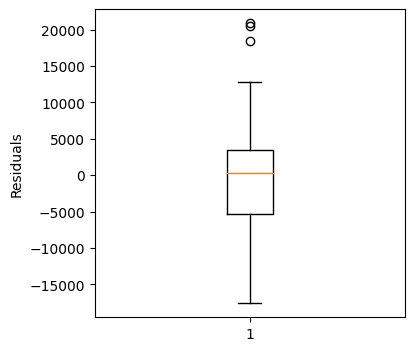

In [ ]:
# Box Plot
fig = plt.figure(figsize = (4, 4))
plt.boxplot(water['residuals'])
plt.ylabel("Residuals")
plt.show()

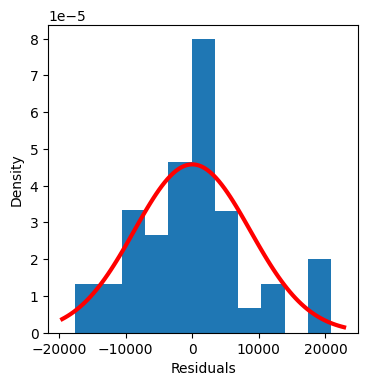

In [ ]:
# Histogram
fig = plt.figure(figsize = (4, 4))

# plot histogram (density=True so that it's on the same scale as the normal distribution)
plt.hist(water['residuals'], density = True, bins = 11)
plt.xlabel("Residuals")
plt.ylabel("Density")

# calculate mean and standard deviation
mean = np.mean(water['residuals'])
sd = np.std(water['residuals'])

# generate x values to plot
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# plot normal distribution curve
plt.plot(x, stats.norm.pdf(x, mean, sd), color = 'r', lw = 3)
plt.show()

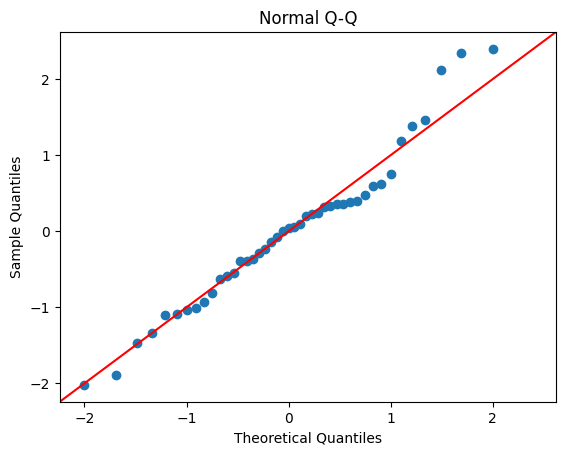

In [ ]:
# Normal Probability Plot
sm.qqplot(water['residuals'], line = '45', fit = True)
plt.title("Normal Q-Q")
plt.show()

These plots show that the residuals are a little right-skewed, and that there may be a few outliers on those upper theoretical quantities.

#### 9. (E) The residuals have equal (constant) variance across all values of $X$ (homoscedastic) (use one diagnostic tool)

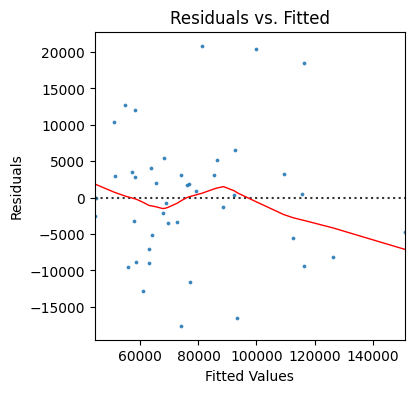

In [ ]:
fig = plt.figure(figsize = (4, 4))
sns.residplot(x = water['fittedvalues'], y = water['residuals'],
                          lowess = True,
                          scatter_kws = {'s': 3},
                          line_kws = {'color': 'red', 'lw': 1})
plt.title("Residuals vs. Fitted")
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
plt.show()

There is some homoscedasity, especially at those upper levels.

#### 10. (A) The model describes all observations (i.e., there are no influential points) (use two diagnostic tools)

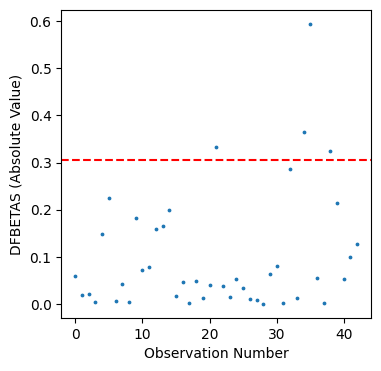

,Precip,Runoff,residuals,fittedvalues,dfbetas
35,23.86,135043,18494.106570,116548.893430,0.594852
34,19.45,120463,20462.568004,100000.431996,0.364901
38,26.46,118144,-8161.355953,126305.355953,-0.325368
21,33.07,146345,-4764.285676,151109.285676,-0.332424


In [ ]:
# DFBETAS
dir(res)
res.get_influence().dfbetas
water['dfbetas'] = res.get_influence().dfbetas[:,1]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFBETAS (Absolute Value)")
plt.xlabel("Observation Number")
plt.scatter(water.index, np.abs(water['dfbetas']), s = 3)
plt.axhline(y = 2 / np.sqrt(len(water)), color = 'r', linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab potential outliers
outliers_dfbetas = water[np.abs(water['dfbetas']) > 2 / np.sqrt(len(water))]
outliers_dfbetas.sort_values(by = 'dfbetas', ascending = False)

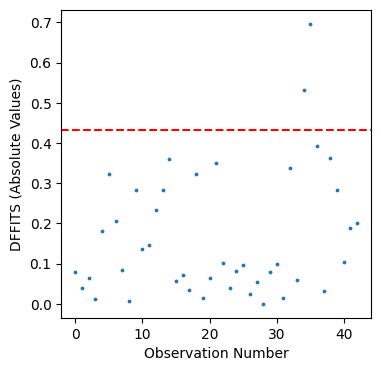

In [ ]:
# DFFITS
water['dffits'] = res.get_influence().dffits[0]

fig = plt.figure(figsize = (4, 4))
plt.ylabel("DFFITS (Absolute Values)")
plt.xlabel("Observation Number")
plt.scatter(water.index, np.abs(water['dffits']), s = 3)
plt.axhline(y = 2 * np.sqrt(len(res.params) / len(water)), color = 'r', linestyle = 'dashed')
plt.show()

# OPTIONAL: code to grab potential outliers
# outliers_dffits = cars[np.abs(cars['dffits']) > 2*np.sqrt(len(res.params)/len(cars))]
# outliers_dffits.sort_values(by = 'dffits', ascending = False)

There is definitely an influential point that sits a good ways above the rest of the DFBETA values - it's a little less influential in the DFFITS.

#### 11. (R) Additional predictor variables are not required (no diagnostic tools - just think about the variables you have and if there are other variables you think would help predict the response)

The only additional predictor variable I could think of may be sunlight level/tempurature, so that may be something to look into in future analyses.

### Based on your answers to questions 6 through 11, you may (or may not) have decided a transformation to the data is needed. This was, hopefully, good practice for assessing model assumptions. For simplicity for this assignment, we will use the orignial model (no transformations) for the rest of the questions. While this may be less satisifying, it will save you time.:)

#### 12. Mathematically write out the fitted simple linear regression model for this data set using the coefficients you found above (do not use betas). Do not use "X" and "Y" in your model - use variable names that are fairly descriptive.

$R_i = 27010 + 3752 \times P_i$

#### 13. Print a summary of the linear model. Interpret the 95% confidence interval for the slope.

In [ ]:
# Prepare data
y = water['Runoff']
X = sm.add_constant(water['Precip'])
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Runoff   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     302.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.56e-20
Time:                        03:14:45   Log-Likelihood:                -451.13
No. Observations:                  43   AIC:                             906.3
Df Residuals:                      41   BIC:                             909.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.701e+04   3218.855      8.393      0.0

We are 95% confident that for every 1 in increase in precipitation, the average slope will increase by 3,316 to 4,188 foot-acres.


#### 14. Based on the confidence interval, does an increase in snowfall *significantly* increase stream water? Why or why not?

Yes, this is significant because 0 is not included in the interval.

#### 15. Print a summary of the linear model. Interpret the results from the hypothesis test output for the slope.

In [ ]:
# Prepare data
y = water['Runoff']
X = sm.add_constant(water['Precip'])
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Runoff   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     302.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.56e-20
Time:                        03:20:01   Log-Likelihood:                -451.13
No. Observations:                  43   AIC:                             906.3
Df Residuals:                      41   BIC:                             909.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.701e+04   3218.855      8.393      0.0

The T-value is 17.394, and the resulting P-value outputs as 0.0. We can therefore reject the null hypothesis, that this correlation could happen by random chance.

#### 16. Briefly describe the difference between (1) a confidence interval for the slope, (2) a confidence interval for the mean of $Y$, and (3) a prediction interval for individual observations.

(1) The confidence interval for the slope estimates the range where the slope of the true regression line will fall.
(2) The confidence interval for the mean of Y estimates the range where the mean of Y should fall, given a specific value of X.
(3) A prediction interval for individual observations estimates a specific point where a specific observation of Y will fall, given a specific value of X. This is why it is typically much wider than the other two intervals.

#### 17. Compute, print, *and interpret* a 95% confidence interval for the average of $Y$ when $x_i=30$.

In [ ]:
pred = res.get_prediction([1, 30])
pred.summary_frame(alpha = 0.05).iloc[:, [0, 2, 3]]

,mean,mean_ci_lower,mean_ci_upper
0,139589.154927,131902.181102,147276.128753


We are 95% confident that when the snowfall is 30 inches, the average runoff will fall between 131,902 and 147,276 foot-acres.

#### 18. Create a confidence band for the average of $Y$ across all values of $X$, and overlay this band (using a distinct color) on your previous scatterplot that you created in 4. Print the plot.

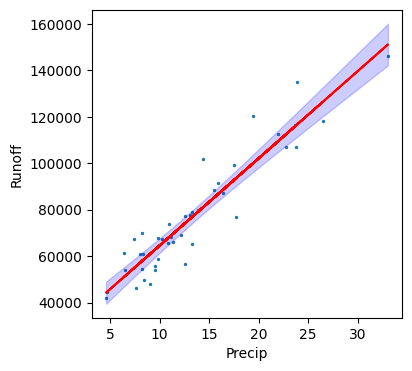

In [ ]:
# Define X values to predict
x = np.linspace(min(water['Precip']), max(water['Precip']), 200)
X = np.vstack((np.ones(200), x)).T

# Predict and store results with confidence intervals
pred = res.get_prediction(X).summary_frame(alpha = 0.05)

# Plot the predictions
plot_ols_line(water['Precip'], water['Runoff'])
plt.fill_between(x, pred['mean_ci_lower'], pred['mean_ci_upper'], color = 'blue', alpha = 0.2)
plt.show()

#### 19. Briefly explain why the confidence band is shaped the way that it is.

Because we have more data points around the center, we can be more confident about the values in that area.

#### 20. Compute, print, *and interpret* a 95% prediction interval for $Y$ when $x_i=30$.

In [ ]:
pred = res.get_prediction([1, 30])
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,139589.154927,3806.297551,131902.181102,147276.128753,119998.783941,159179.525914


When there is 30 inches of snowfall, the average runoff will fall within 131,902 and 147,276 foot-acres.

#### 21. Create a prediction band for $Y$ across all values of $X$, and overlay this band (using a distinct color) on your previous scatterplot that you created in 4. Print the plot.


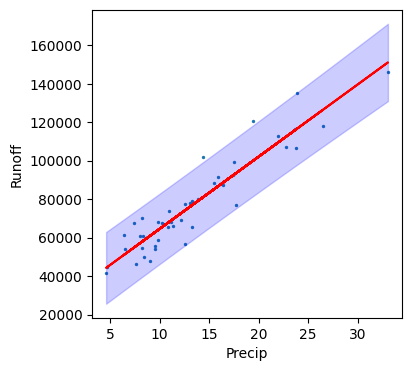

In [41]:
# Define X values to predict
x = np.linspace(min(water['Precip']), max(water['Precip']), 200)
X = np.vstack((np.ones(200), x)).T

# Predict and store results with confidence intervals
pred = res.get_prediction(X).summary_frame(alpha = 0.05)

# Plot the predictions
plot_ols_line(water['Precip'], water['Runoff'])
plt.fill_between(x, pred['obs_ci_lower'], pred['obs_ci_upper'], color = 'blue', alpha = 0.2)
plt.show()

#### 22. Briefly explain how/why the prediction band differs from the confidence band.

The prediction band predicts a specific value of Y, not an average.

#### 23. Compute and print the MSE (Mean Square Error) for the linear model you fit.

In [42]:
mse = res.mse_resid
mse

79610011.08140893

#### 24. Briefly explain (1) what the MSE estimates and (2) a drawback to using it as a model evaluation metric.

#### 25. Calculate the RMSE (Root Mean Square Error) for the linear model you fit. Print and interpret the result.

In [45]:
rmse = np.sqrt(res.mse_resid)
rmse

8922.444232462814

The RMSE represents the standard deviation of the residuals. an RMSE of 7,212 means that, on average, the model's predictions variate from the mean by 7,212.

#### 26. Calculate the MAE (Mean Absolute Error) for the linear model you fit. Print and interpret the result.


In [47]:
mae = np.sum(np.abs(water['residuals'])) / res.df_resid
mae

6954.957463974923

On average, the model's predictions deviate from the actual observed values by about 6,955 acre-feet. Unlike RMSE, MAE gives equal weight to all errors, regardless of their size.

#### 27. Briefly explain a benefit of using the MAE as a model evaluation metric over the RMSE.

Because it weights all values equally, it's more resistant to outliers.

#### 28. Print a summary of the linear model. Briefly interpret the R-Squared (Coefficient of Determination) value.

In [48]:
# Prepare data
y = water['Runoff']
X = sm.add_constant(water['Precip'])
# Fit simple linear regression model using ordinary least squares
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Runoff   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     302.6
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           1.56e-20
Time:                        04:11:30   Log-Likelihood:                -451.13
No. Observations:                  43   AIC:                             906.3
Df Residuals:                      41   BIC:                             909.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.701e+04   3218.855      8.393      0.0

The R-squared value is 0.881, meaning 88% of the variance in runoff is explained by snowfall.

#### 29. Briefly interpret the Adjusted R-Squared (shown in the summary output above).

The adjusted R-squared has penalizations for the number of predictor variables int the model. since there is only one, it is veirtually the same as the regular R-squared.

#### 30. Look at the F-Statistic and corresponding $p$-value from the summary of the linear model (output shown above). Do these values indicate that $X$ has a statistically significant linear association with $Y$?

Yes. The T-value is huge, and the P-value is a negligible number, basically zero. Because of these statistics, X does indeed have a statistically significant relationship with Y.

#### 31. Briefly summarize what you learned, personally, from this analysis about the statistics, model fitting process, etc.

Intervals can predict all sorts of values. It's important to know which interval explains what you're looking for.

#### 32. Briefly summarize what you learned from this analysis *to a non-statistician*. Write a few sentences about (1) the purpose of this data set and analysis and (2) what you learned about this data set from your analysis. Write your response as if you were addressing a business manager (avoid using statistics jargon) and just provide the main take-aways.


1. Purpose of the Data Set and Analysis:
This analysis looked into data that recorded the amount of snowfall and the resulting stream runoff. Essentially, we wanted to understand if and how the amount of snowfall impacts the volume of water that flows in streams.

2. What We Learned:
From our analysis, it's clear that there's a strong relationship between snowfall and stream runoff. When there's more snowfall, we can expect a significant increase in stream water flow. This relationship is consistent and prominent in the data we analyzed.

In simple terms, if we're expecting a year with heavy snowfall, it's likely we'll also see a notable rise in water levels in streams. This information can be crucial for planning purposes, whether it's related to water resource management or anticipating potential flooding.